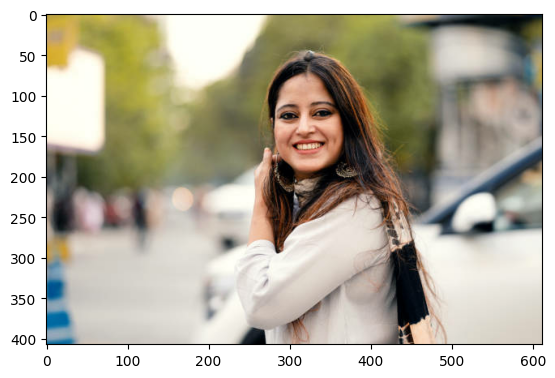

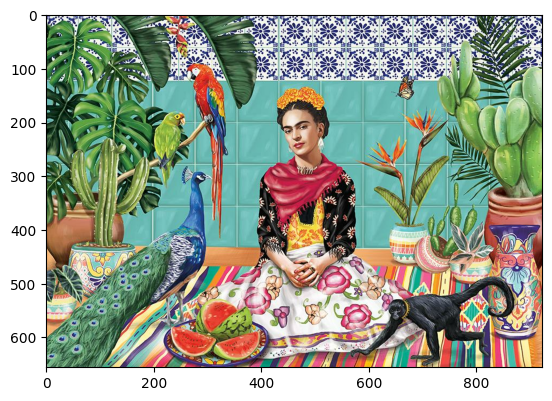

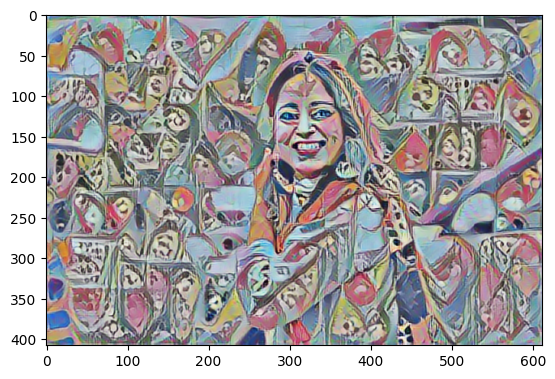

True

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load a pre-trained model for neural style transfer
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Define a function to load an image
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.expand_dims(image, axis=0)
    return image

# Load the content and style images
content_image = load_image('/content/1.jpeg')
style_image = load_image('/content/frida.jpg')

content_image.shape

# Show the content image
plt.imshow(np.squeeze(content_image))
plt.show()

# Show the style image
plt.imshow(np.squeeze(style_image))
plt.show()

# Apply neural style transfer
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

# Show the stylized image
plt.imshow(np.squeeze(stylized_image))
plt.show()

# Save the generated stylized image
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))
